In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
#from pymodulon.plotting import *
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.stats import spearmanr, pearsonr
import seaborn as sns

In [2]:
ica_data = load_json_model('../data/yarrowia2025.json')

In [13]:
o2_projects = ['O2_oscillation_0.05', 'O2_oscillation_0.2', 'O2_oscillation_0.1']

o2_samples = ica_data.sample_table[ica_data.sample_table['project'].isin(o2_projects)].copy(deep=False)

o2_samples

,File name,condition,project,reference_condition,Strain,Mode of operation,Media,Limitation,C-source,Growth rate,DO,pH,Temperature,Read1,Read2
yl_101,PD019 A1 S02 #1,µ0.05_DO50,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,50,6,30,ylipolytic2025_repeat/PD017A3S072A_1.fq.gz,ylipolytic2025_repeat/PD017A3S072A_2.fq.gz
yl_102,PD019 A1 S02 #2,µ0.05_DO50,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,50,6,30,ylipolytic2025_repeat/PD019A1S021A_1.fq.gz,ylipolytic2025_repeat/PD019A1S021A_2.fq.gz
yl_105,PD019 A1 S04 #1,µ0.05_DO10,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,10,6,30,ylipolytic2025_repeat/PD019A1S032A_1.fq.gz,ylipolytic2025_repeat/PD019A1S032A_2.fq.gz
yl_106,PD019 A1 S04 #2,µ0.05_DO10,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,10,6,30,ylipolytic2025_repeat/PD019A1S041A_1.fq.gz,ylipolytic2025_repeat/PD019A1S041A_2.fq.gz
yl_107,PD019 A1 S05 #1,µ0.05_DO5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,5,6,30,ylipolytic2025_repeat/PD019A1S042A_1.fq.gz,ylipolytic2025_repeat/PD019A1S042A_2.fq.gz
yl_108,PD019 A1 S05 #2,µ0.05_DO5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,5,6,30,ylipolytic2025_repeat/PD019A1S051A_1.fq.gz,ylipolytic2025_repeat/PD019A1S051A_2.fq.gz
yl_109,PD019 A1 S06 #1,µ0.05_DO2.5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,2.5,6,30,ylipolytic2025_repeat/PD019A1S052A_1.fq.gz,ylipolytic2025_repeat/PD019A1S052A_2.fq.gz
yl_110,PD019 A1 S06 #2,µ0.05_DO2.5,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,2.5,6,30,ylipolytic2025_repeat/PD019A1S061A_1.fq.gz,ylipolytic2025_repeat/PD019A1S061A_2.fq.gz
yl_111,PD019 A1 S07 #1,µ0.05_DO0,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,0,6,30,ylipolytic2025_repeat/PD019A1S062A_1.fq.gz,ylipolytic2025_repeat/PD019A1S062A_2.fq.gz
yl_112,PD019 A1 S07 #2,µ0.05_DO0,O2_oscillation_0.05,µ0.05_DO10,W29,Continuous,Delft,Carbon,Glucose,0.05,0,6,30,ylipolytic2025_repeat/PD019A1S071A_1.fq.gz,ylipolytic2025_repeat/PD019A1S071A_2.fq.gz


In [12]:
list(set([w for w in ica_data.sample_table['project'] if 'O2_oscillation_' in w]))

['O2_oscillation_0.05', 'O2_oscillation_0.2', 'O2_oscillation_0.1']

In [14]:
def pca_scatter3(df, labels=None, scale=True, label_points=False,name='pca_plot',
                 palette='tab10', figsize=(12, 4), s=45, alpha=0.9):
    """
    PCA on a genes × samples table with a 3‑panel pairwise plot (PC1‑PC3).

    Parameters
    ----------
    df : pandas.DataFrame
        Rows = genes/features, Columns = samples/conditions.
    labels : list‑like or pandas.Series, optional
        A list/category for each column (same length/order as df.columns).
        • If `label_points` is False (default) they are used for *colours*.
        • If `label_points` is True they are drawn as *text* at each point.
    scale : bool, default True
        Standard‑scale each gene before PCA (zero mean, unit variance).
    label_points : bool, default False
        If True, annotate each point with the corresponding entry in `labels`.
        If False, unique entries in labels are mapped to colours with a legend.
    palette : str or sequence
        Matplotlib colour palette name or explicit colour list.
    figsize : tuple, default (12, 4)
        Overall figure size (three equal‑width panels).
    s : int or float, default 45
        Marker size for scatter points.
    alpha : float, default 0.9
        Marker transparency.

    Returns
    -------
    pca : sklearn.decomposition.PCA
        The fitted PCA object (for further inspection if needed).
    """
    # ---------- 1. prepare the data (samples as rows) ----------
    X = df.T.values                                       # (n_samples, n_genes)
    if scale:
        X = StandardScaler().fit_transform(X)

    # ---------- 2. run PCA ----------
    pca = PCA(n_components=3, random_state=0)
    PCs = pca.fit_transform(X)                            # shape = (n_samples, 3)
    expl = pca.explained_variance_ratio_ * 100            # %

    # ---------- 3. reporting ----------
    print("Variance explained: "
          f"PC1 = {expl[0]:.1f} %,  PC2 = {expl[1]:.1f} %,  PC3 = {expl[2]:.1f} %")

    # ---------- 4. figure set‑up ----------
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharex=False, sharey=False)

    # colours / text for each point
    if labels is None:
        labels = np.repeat('', len(df.columns))           # blank labels
    labels = pd.Series(labels, index=df.columns)

    if label_points:
        colour_map = np.full(len(labels), 'tab:blue')     # one colour, text only
    else:
        uniq = labels.unique()
        palette = plt.get_cmap(palette).colors if isinstance(palette, str) else palette
        colour_map = labels.apply(lambda z: palette[list(uniq).index(z) % len(palette)])

    # ---------- 5. scatter on PC pairs ----------
    axes_pairs = [(0, 1), (0, 2), (1, 2)]
    for ax, (i, j) in zip(axes, axes_pairs):
        ax.scatter(PCs[:, i], PCs[:, j], c=colour_map, s=s, alpha=alpha, edgecolor='k')
        ax.set_xlabel(f"PC{i+1} ({expl[i]:.1f} %)")
        ax.set_ylabel(f"PC{j+1} ({expl[j]:.1f} %)")
        ax.xaxis.set_major_locator(MaxNLocator(5))
        ax.yaxis.set_major_locator(MaxNLocator(5))
        ax.axhline(0, color='grey', lw=0.6)
        ax.axvline(0, color='grey', lw=0.6)

        if label_points:
            for (x, y), txt in zip(PCs[:, [i, j]], labels):
                ax.text(x, y, str(txt), fontsize=8,
                        ha='center', va='center',
                        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7))

    # common legend (colour‑based) if not text labelling
    if not label_points and labels.nunique() > 0:
        handles = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=palette[k % len(palette)],
                              markeredgecolor='k', markersize=np.sqrt(s))
                   for k, _ in enumerate(labels.unique())]
        axes[-1].legend(handles, labels.unique(), frameon=False,
                        bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout()
    #plt.savefig(name+'.png',dpi=300,transparent=True)
    return pca

Overall variance analysis (Major variance comes from 0.005 hr-1 growth rate samples)

Variance explained: PC1 = 30.8 %,  PC2 = 20.2 %,  PC3 = 13.0 %


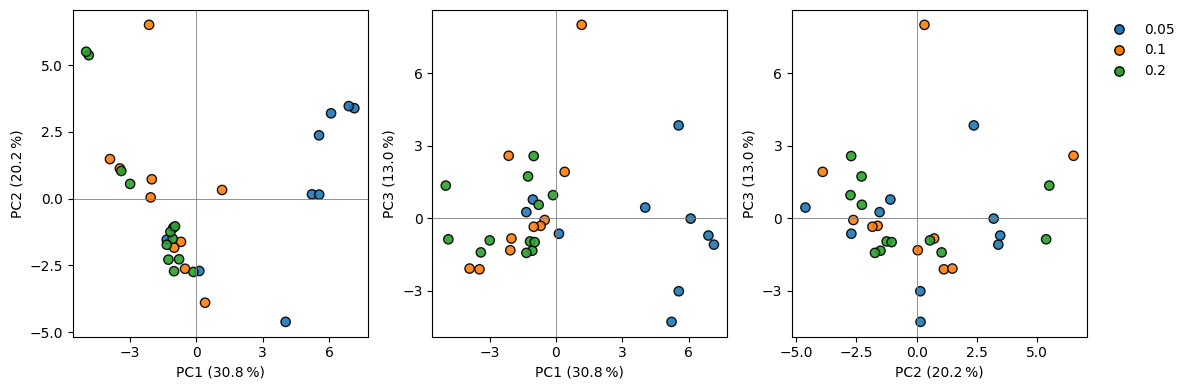

In [16]:
pca_model = pca_scatter3(ica_data.A[o2_samples.index], labels=o2_samples['Growth rate'].tolist(), scale=True, label_points=False,name='tpm_pca')


Variance explained: PC1 = 30.8 %,  PC2 = 20.2 %,  PC3 = 13.0 %


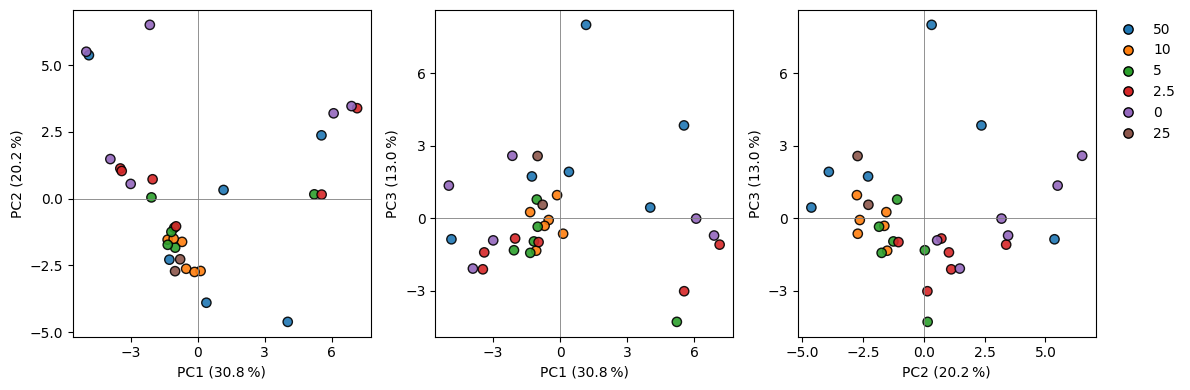

In [21]:
pca_model = pca_scatter3(ica_data.A[o2_samples.index], labels=o2_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


O2 related variance analysis

0.05 hr-1

Variance explained: PC1 = 33.8 %,  PC2 = 22.2 %,  PC3 = 16.0 %


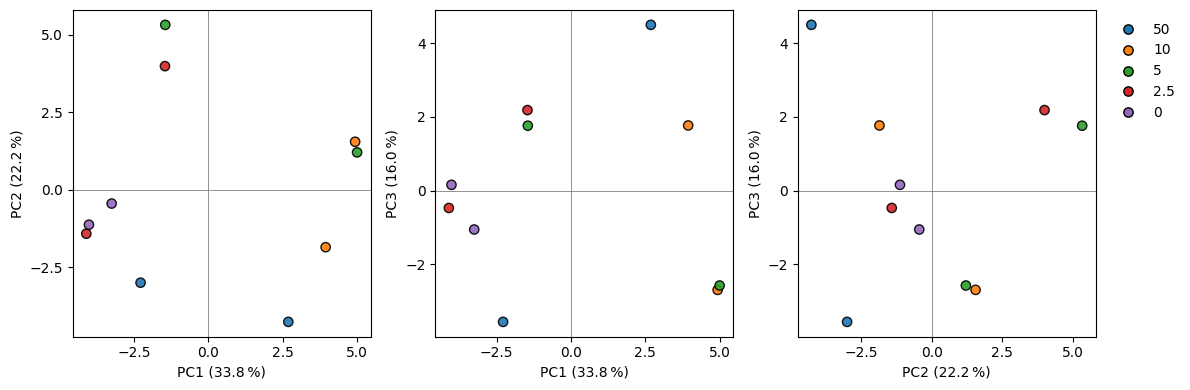

In [18]:
low_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.05'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[low_GR_samples.index], labels=low_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


0.1 hr-1

Variance explained: PC1 = 37.9 %,  PC2 = 32.7 %,  PC3 = 13.4 %


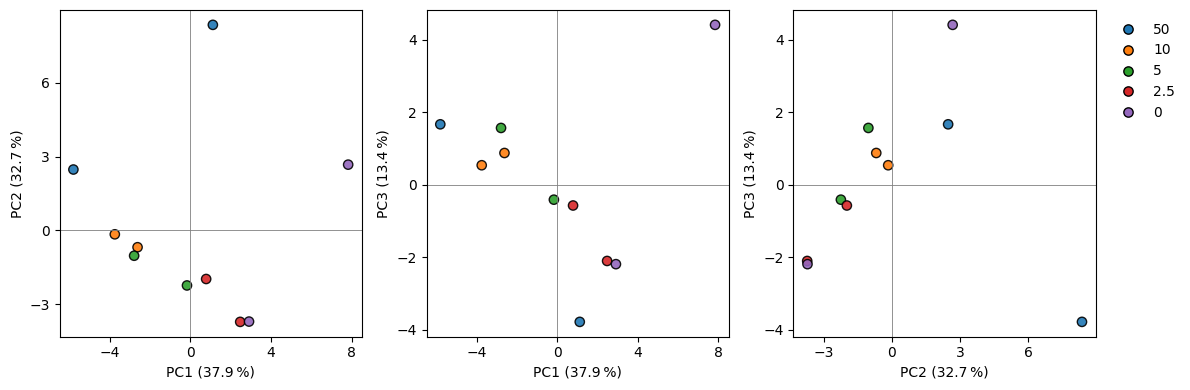

In [ ]:
med_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.1'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[med_GR_samples.index], labels=med_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


0.2 hr-1

Variance explained: PC1 = 53.4 %,  PC2 = 17.4 %,  PC3 = 11.9 %


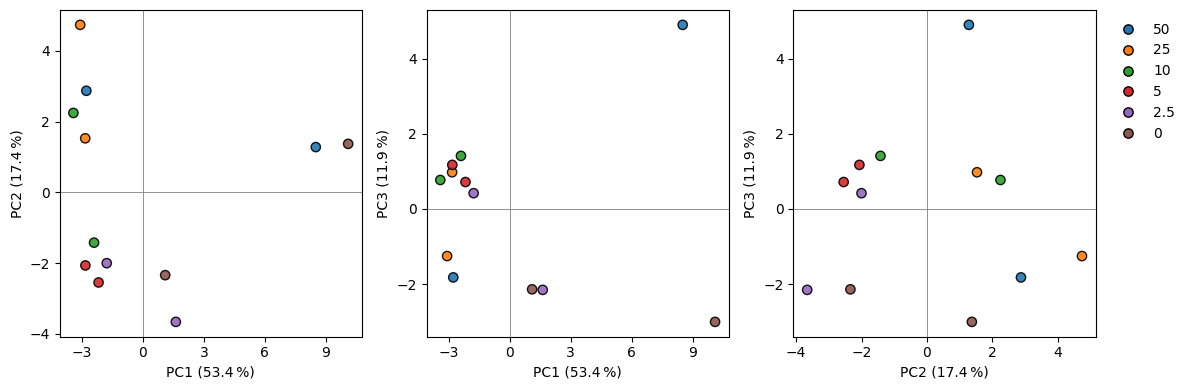

In [20]:
high_GR_samples = ica_data.sample_table[ica_data.sample_table['project']=='O2_oscillation_0.2'].copy(deep=False)

pca_model = pca_scatter3(ica_data.A[high_GR_samples.index], labels=high_GR_samples['DO'].tolist(), scale=True, label_points=False,name='tpm_pca')


In [22]:
## correlating DO 

In [55]:
low_do_samples = ica_data.sample_table[(ica_data.sample_table['project']=='O2_oscillation_0.1')]
low_do = low_do_samples['DO'].tolist()

do_df = pd.DataFrame({'DO': low_do}, index=ica_data.A[low_do_samples.index].columns)
df_merged = ica_data.A[low_do_samples.index].T.join(do_df)
low_do_df = df_merged.groupby('DO').mean().T


low_do_df = low_do_df[['0','2.5','5','10','50']]

In [56]:
# Compute Spearman correlation for each row
do_correlations = []
do_pvalues = []

for idx, row in low_do_df.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    do_correlations.append(corr)
    do_pvalues.append(pval)

do_corr_df = pd.DataFrame({
    'iModulon': low_do_df .index,
    'Spearman_corr': do_correlations,
    'p_value': do_pvalues
})


do_corr_df = do_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)


In [57]:
do_corr_df

,iModulon,Spearman_corr,p_value
0,21,0.9,0.037386
1,3,0.5,0.391002
2,6,0.4,0.504632
3,22,0.3,0.623838
4,10,0.3,0.623838
5,26,0.3,0.623838
6,15,0.3,0.623838
7,14,0.3,0.623838
8,27,0.1,0.872889
9,18,0.1,0.872889


In [48]:
ica_data.gene_table

,accession,source,feature,start,end,score,strand,phase,attributes,gene_name,...,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE,regulator
YALI1_A00014g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A00019g,NC_090770.1,RefSeq,CDS,1806.0,1963.0,.,-,2,ID=cds-XP_068137694.1;Parent=rna-XM_068281593....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A00032g,NC_090770.1,RefSeq,CDS,3285.0,3920.0,.,+,0,ID=cds-XP_068137695.1;Parent=rna-XM_068281594....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A00058g,NC_090770.1,RefSeq,CDS,5868.0,8531.0,.,+,0,ID=cds-XP_499603.2;Parent=rna-XM_499603.3;Dbxr...,NaN,...,NaN,T,oligopeptide transporter,OPT6,"GO:0000138,GO:0000322,GO:0000323,GO:0000324,GO...",OPT,-,-,-,NaN
YALI1_A00102g,NC_090770.1,RefSeq,CDS,10299.0,12134.0,.,+,0,ID=cds-XP_499604.1;Parent=rna-XM_499604.3;Dbxr...,NaN,...,Hsp70 family ATPase SSB2,O,Belongs to the heat shock protein 70 family,SSB1,"GO:0000054,GO:0002181,GO:0003674,GO:0003824,GO...",HSP70,"ko03040,ko04010,ko04141,ko04144,ko04213,ko0461...","M00353,M00355","ko00000,ko00001,ko00002,ko01009,ko03009,ko0302...","ABF1,RAP1,FHL1,MCM1,MSN2,TYE7,YAP1,CUP9,PDR1,PDR1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YALI1_F39818g,NC_090775.1,RefSeq,CDS,3981556.0,3981836.0,.,-,2,ID=cds-XP_068139621.1;Parent=rna-XM_068283520....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_F39844g,NC_090775.1,RefSeq,CDS,3984421.0,3985158.0,.,+,0,ID=cds-XP_065950451.2;Parent=rna-XM_066094379....,NaN,...,NaN,G,Saccharomyces cerevisiae YJR107w,-,-,Lipase_3,-,-,"ko00000,ko01000",NaN
YALI1_F39885g,NC_090775.1,RefSeq,CDS,3985347.0,3988589.0,.,-,0,ID=cds-XP_506122.1;Parent=rna-XM_506122.1;Dbxr...,NaN,...,histone acetyltransferase,K,to Saccharomyces cerevisiae TAF1 (YGR274C),-,"GO:0000428,GO:0000988,GO:0000989,GO:0000990,GO...","DUF3591,zf-CCHC_6","ko03022,map03022",-,"ko00000,ko00001,ko01001,ko03021,ko03036",NaN
YALI1_F39891g,NC_090775.1,RefSeq,CDS,3989177.0,3991672.0,.,+,0,ID=cds-XP_506123.3;Parent=rna-XM_506123.3;Dbxr...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
ica_data.view_imodulon(26)[abs(ica_data.view_imodulon(26)['gene_weight'])>0.05]

,gene_weight,accession,source,feature,start,end,score,strand,phase,attributes,...,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE,regulator
YALI1_A08175g,-0.051538,NC_090770.1,RefSeq,CDS,814370.0,817588.0,.,-,0,ID=cds-XP_499875.3;Parent=rna-XM_499875.3;Dbxr...,...,DNA-directed DNA polymerase delta POL3,L,DNA Polymerase,POL3,"GO:0000228,GO:0000278,GO:0000731,GO:0000781,GO...","DNA_pol_B,DNA_pol_B_exo1,zf-C4pol","ko00230,ko00240,ko01100,ko03030,ko03410,ko0342...",M00262,"ko00000,ko00001,ko00002,ko01000,ko03032,ko03400",NaN
YALI1_A10943r,0.050882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_A15017t,-0.054110,NC_090770.1,RefSeq,CDS,1500545.0,1501732.0,.,-,0,ID=cds-XP_065950122.2;Parent=rna-XM_066094050....,...,NaN,S,MULE transposase domain,-,-,"FAR1,MULE,zf-CCHC_6",-,-,-,NaN
YALI1_A17348g,-0.052889,NC_090770.1,RefSeq,CDS,1734849.0,1735760.0,.,+,0,ID=cds-XP_500154.3;Parent=rna-XM_500154.3;Dbxr...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YALI1_B15109g,-0.053972,NC_090771.1,RefSeq,CDS,1510974.0,1512413.0,.,+,0,ID=cds-XP_500758.2;Parent=rna-XM_500758.3;Dbxr...,...,DNA primase subunit PRI1,H,Belongs to the eukaryotic-type primase small s...,PRI1,"GO:0000228,GO:0000278,GO:0000428,GO:0000785,GO...",DNA_primase_S,"ko00230,ko00240,ko01100,ko03030,map00230,map00...",M00261,"ko00000,ko00001,ko00002,ko01000,ko03032",NaN
YALI1_B29419g,0.057283,NC_090771.1,RefSeq,CDS,2940786.0,2941886.0,.,-,0,ID=cds-XP_501224.1;Parent=rna-XM_501224.3;Dbxr...,...,NaN,C,Catalyzes the NAD( )-dependent oxidation of fo...,FDH1,"GO:0003674,GO:0003824,GO:0005575,GO:0005576,GO...","2-Hacid_dh,2-Hacid_dh_C","ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,"ko00000,ko00001,ko01000",NaN
YALI1_C00442g,-0.052395,NC_090772.1,RefSeq,CDS,44202.0,45650.0,.,+,0,ID=cds-XP_501283.1;Parent=rna-XM_501283.1;Dbxr...,...,NaN,S,signal transduction involved in G2 DNA damage ...,-,"GO:0000003,GO:0000151,GO:0003674,GO:0005488,GO...",WD40,-,-,"ko00000,ko04121",NaN
YALI1_C00913g,-0.051837,NC_090772.1,RefSeq,CDS,89582.0,91396.0,.,-,0,ID=cds-XP_501295.1;Parent=rna-XM_501295.1;Dbxr...,...,AAA family ATPase CDC6,L,Belongs to the CDC6 cdc18 family,CDC6,"GO:0000075,GO:0000076,GO:0000082,GO:0000166,GO...","AAA,AAA_16,AAA_22,Cdc6_C","ko04110,ko04111,ko04113,map04110,map04111,map0...",-,"ko00000,ko00001,ko03032","SWI5,GCR1,GCR2,MBP1,MCM1,MSN2,MSN4,SWI4,TEC1,TYE7"
YALI1_C04553g,0.051169,NC_090772.1,RefSeq,CDS,454899.0,455348.0,.,-,0,ID=cds-XP_501398.1;Parent=rna-XM_501398.3;Dbxr...,...,NaN,O,Belongs to the small heat shock protein (HSP20...,-,"GO:0003674,GO:0003676,GO:0003723,GO:0003729,GO...",HSP20,"ko04141,map04141",-,"ko00000,ko00001,ko03110",NaN
YALI1_C17314g,-0.058068,NC_090772.1,RefSeq,CDS,1731255.0,1731418.0,.,-,2,ID=cds-XP_068138432.1;Parent=rna-XM_068282331....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
